In [0]:
import os
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [372]:
savedir = ""
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    savedir = "/content/gdrive/My Drive/colab/"
    try:
        os.mkdir(savedir)
    except FileExistsError:
        print("Directory \"%s\" already exists" % (savedir))

os.listdir(savedir)
os.chdir(savedir)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Directory "/content/gdrive/My Drive/colab/" already exists


In [0]:
college = pd.read_csv('College.csv', header=0)

In [374]:
college.rename({'Unnamed: 0':'University'}, axis=1)
college.set_index(college.iloc[:,0],inplace=True)
college = college.drop('Unnamed: 0', axis=1)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [375]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


###两种scatter_matrix的画法

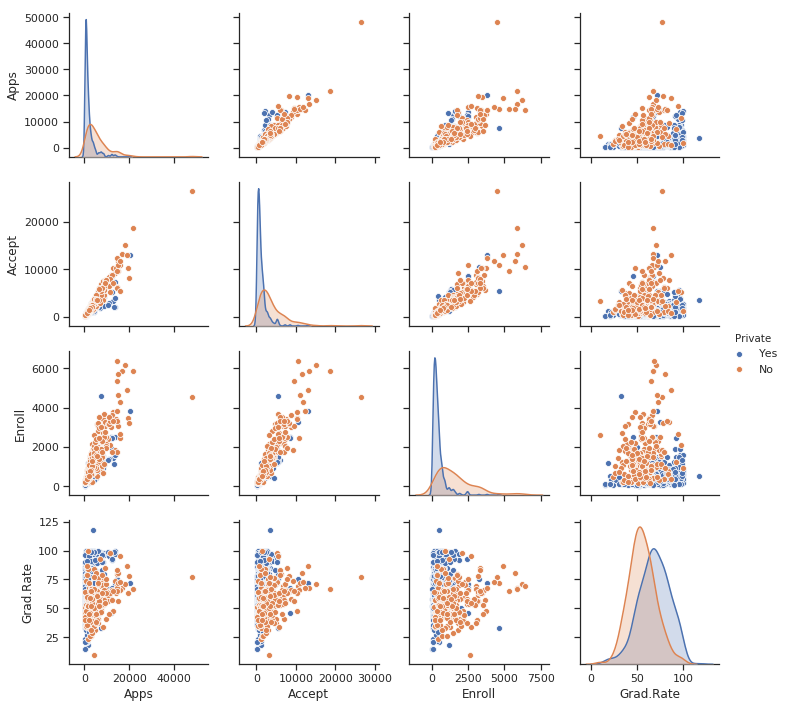

In [376]:
sns.set(style="ticks")
sns.pairplot(college[['Apps', 'Accept', 'Enroll', 'Grad.Rate', 'Private']], hue='Private')

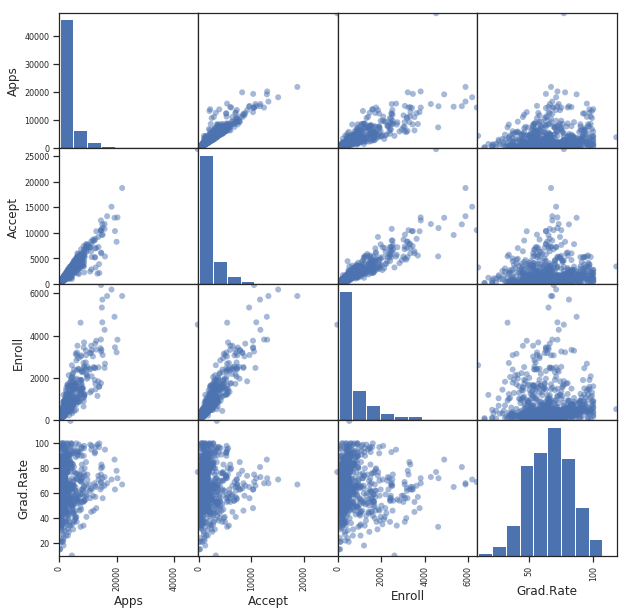

In [377]:
pd.plotting.scatter_matrix(
    college[['Apps', 'Accept', 'Enroll', 'Grad.Rate', 'Private']], 
    alpha=0.5, # 透明度
    figsize=(10,10),
    diagonal='hist', # hist/kde （密度图）
    marker='o',
    range_padding=0.01) #图像在x，y轴附近留白
plt.show()

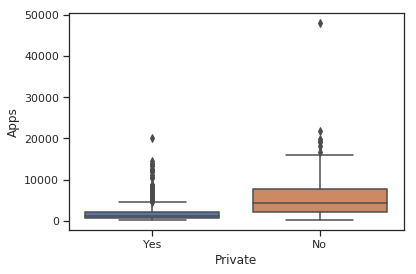

In [378]:
sns.boxplot(x='Private', y='Apps', data=college[['Apps', 'Private']])

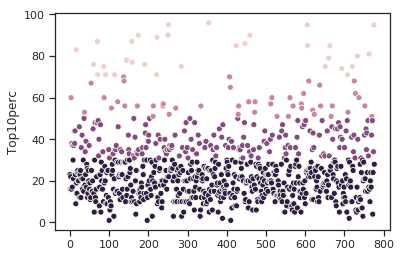

In [379]:
college['Scatter_col'] = 1
college.loc[college['Top10perc'] <= 70, 'Scatter_col'] = 2
college.loc[college['Top10perc'] <= 50, 'Scatter_col'] = 3
college.loc[college['Top10perc'] <= 30, 'Scatter_col'] = 4
college = college.reset_index(drop=False)
college = college.rename({'Unnamed: 0':'University'}, axis=1)
sns.scatterplot(x=college.index, y=college.Top10perc, hue=college.Scatter_col, legend=False)

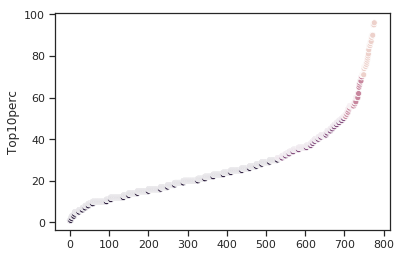

In [380]:
line_num = range(0, college.shape[0], 1)
college_sorted = college.sort_values('Top10perc')
college_sorted = college_sorted.reset_index(drop=True)
#print(college.head())
sns.scatterplot(x=college_sorted.index, y=college_sorted.Top10perc, hue=college_sorted.Scatter_col, legend=False)

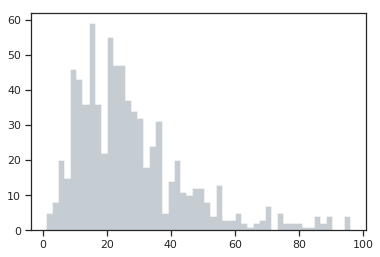

In [419]:
sns.distplot(college_sorted[['Top10perc']], kde=False, bins=50, hist_kws={"histtype": "stepfilled", "color": "slategray" })

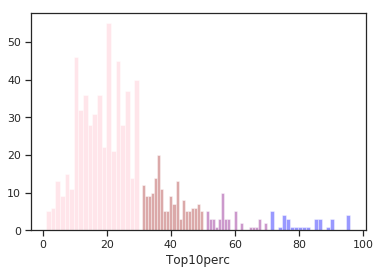

In [420]:
col = ['green', 'blue', 'purple', 'brown', 'pink']
for i in range(1,5,1):
  sns.distplot(college_sorted[college_sorted['Scatter_col'] == i]['Top10perc'], kde=False, bins=20, hist_kws={"color": col[i]})


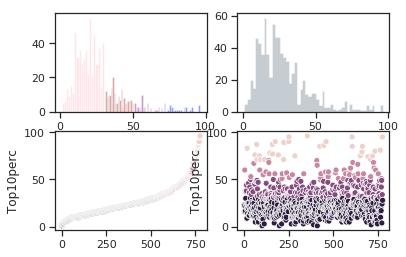

In [423]:
plt.subplot(221)
for i in range(1,5,1):
  sns.distplot(college_sorted[college_sorted['Scatter_col'] == i]['Top10perc'], kde=False, bins=20, hist_kws={"color": col[i]})
  
plt.subplot(222)
sns.distplot(college_sorted[['Top10perc']], kde=False, bins=50, hist_kws={"histtype": "stepfilled", "color": "slategray" })

plt.subplot(223)
sns.scatterplot(x=college_sorted.index, y=college_sorted.Top10perc, hue=college_sorted.Scatter_col, legend=False)

plt.subplot(224)
sns.scatterplot(x=college.index, y=college.Top10perc, hue=college.Scatter_col, legend=False)

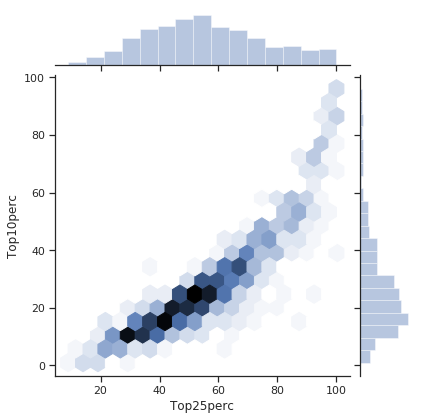

In [430]:
sns.jointplot("Top25perc", "Top10perc", data=college, kind="hex")